In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud


In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jdanz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jdanz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jdanz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Entendimiento del negocio. 

Se desea construir un modelo de aprendizaje autom√°tico supervisado para una posterior implementaci√≥n en un chatbot

# Entendimiento de los Datos 

In [3]:
# Cargamos los datos. 
datatxt = pd.read_csv('../Datos/Dataset_Prueba.csv', encoding='utf-8', sep=',')

In [4]:
datatxt.head()

Tipo                                        Descripci√≥n  \
0  Petici√≥n                Solicito restablecer mi contrase√±a.   
1     Queja  No recib√≠ soporte t√©cnico en el horario acordado.   
2   Reclamo  El equipo entregado no corresponde al solicitado.   
3  Petici√≥n  Necesito informaci√≥n sobre las pol√≠ticas de pr...   
4     Queja  El sistema presenta errores frecuentes al inic...   

                                           Respuesta  
0  Se ha enviado un enlace de restablecimiento al...  
1  Lamentamos el inconveniente, estamos investiga...  
2  Por favor, env√≠e fotograf√≠as del equipo recibi...  
3  Puede consultar nuestras pol√≠ticas en el sigui...  
4  Estamos revisando el problema y le notificarem...

In [5]:
datatxt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tipo         6 non-null      object
 1   Descripci√≥n  6 non-null      object
 2   Respuesta    6 non-null      object
dtypes: object(3)
memory usage: 276.0+ bytes


In [6]:
# Exploraci√≥n b√°sica del dataset
print(f"Forma del dataset: {datatxt.shape}")
print(f"Primeras 5 filas:")
print(datatxt.head())

# Verificar valores nulos
print(f"Valores nulos: {datatxt.isnull().sum().sum()}")

Forma del dataset: (6, 3)
Primeras 5 filas:
       Tipo                                        Descripci√≥n  \
0  Petici√≥n                Solicito restablecer mi contrase√±a.   
1     Queja  No recib√≠ soporte t√©cnico en el horario acordado.   
2   Reclamo  El equipo entregado no corresponde al solicitado.   
3  Petici√≥n  Necesito informaci√≥n sobre las pol√≠ticas de pr...   
4     Queja  El sistema presenta errores frecuentes al inic...   

                                           Respuesta  
0  Se ha enviado un enlace de restablecimiento al...  
1  Lamentamos el inconveniente, estamos investiga...  
2  Por favor, env√≠e fotograf√≠as del equipo recibi...  
3  Puede consultar nuestras pol√≠ticas en el sigui...  
4  Estamos revisando el problema y le notificarem...  
Valores nulos: 0


In [7]:
# Cantidad de palabras 
print(f"Cantidad de palabras: {datatxt['Tipo'].str.split().str.len().sum()}")
# Cantidad de palabras por fila
print(f"Cantidad de palabras por fila: {datatxt['Tipo'].str.split().str.len().mean()}")
# Cantidad de filas
print(f"Cantidad de filas: {datatxt.shape[0]}")
# Cantidad de columnas
print(f"Cantidad de columnas: {datatxt.shape[1]}")

Cantidad de palabras: 6
Cantidad de palabras por fila: 1.0
Cantidad de filas: 6
Cantidad de columnas: 3


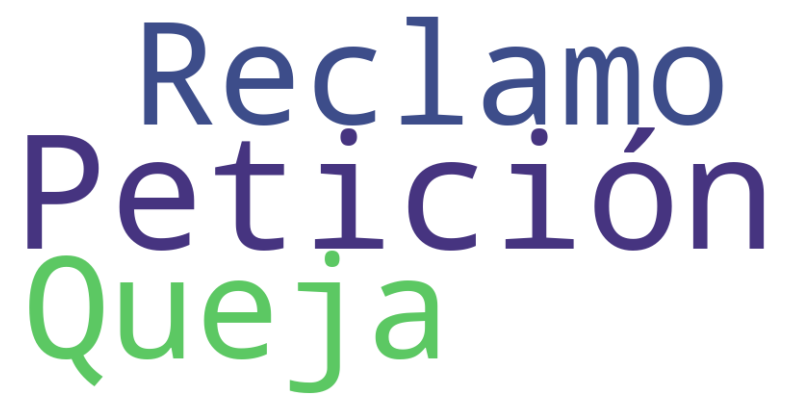

In [8]:
# Nube de palabras

def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
text = ' '.join(datatxt['Tipo'].astype(str))
plot_wordcloud(text)

# Preprocesamiento de los datos 

In [9]:
datatxt_copy = datatxt.copy()

In [10]:
spanish_stopwords = nltk.corpus.stopwords.words('spanish')

# Funci√≥n para limpiar el texto
def limpiar_texto(texto):
    if pd.isna(texto):
        return ""
    texto = texto.lower().strip()  # Min√∫sculas y espacios
    texto = re.sub(r'[^\w\s]', '', texto)  # Quitar puntuaci√≥n
    tokens = word_tokenize(texto)  # Tokenizar
    tokens_limpios = [word for word in tokens if word not in spanish_stopwords]  # Quitar stopwords
    return " ".join(tokens_limpios)

# Aplicar limpieza a la columna Descripci√≥n
datatxt_copy["Descripci√≥n_Limpiada"] = datatxt_copy["Descripci√≥n"].apply(limpiar_texto)

# Guardar el DataFrame limpio en un nuevo archivo CSV
datatxt_copy.to_csv('../Datos/Dataset_Prueba_Limpio.csv', index=False, encoding='utf-8-sig')

# Modelado

In [11]:
# Cargar el dataset limpio
datatxt_limpio = pd.read_csv('../Datos/Dataset_Prueba_Limpio.csv', encoding='utf-8-sig')

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Variables para ML
X = datatxt_limpio["Descripci√≥n_Limpiada"]  # Entrada
y = datatxt_limpio["Tipo"]  # Etiqueta

# Divisi√≥n entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline sin stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        min_df=1,
        max_df=1.0,
        sublinear_tf=True,
        use_idf=True,
        ngram_range=(1, 1),
        stop_words=None        # Sin filtrado de palabras vac√≠as
    )),
    ('svm', SVC(
        C=1.0,
        kernel='linear',
        probability=True
    ))
])

print("\nEntrenando sin filtrado de stopwords...")
pipeline.fit(X_train, y_train)


Entrenando sin filtrado de stopwords...


Pipeline(steps=[('tfidf', TfidfVectorizer(sublinear_tf=True)),
                ('svm', SVC(kernel='linear', probability=True))])

# Validaci√≥n

=== Evaluaci√≥n del Modelo SVM ===
Exactitud (Accuracy): 0.0000
Precisi√≥n ponderada: 0.0000
Recall ponderado: 0.0000
F1-Score ponderado: 0.0000

Reporte de clasificaci√≥n detallado:
              precision    recall  f1-score   support

    Petici√≥n       0.00      0.00      0.00       1.0
       Queja       0.00      0.00      0.00       1.0
     Reclamo       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



c:\Users\jdanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jdanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jdanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

<Figure size 1000x800 with 0 Axes>

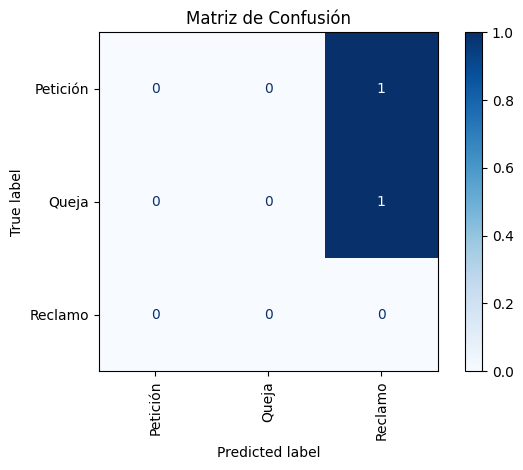

In [13]:
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix,
    precision_recall_fscore_support,
    roc_curve, 
    auc,
    ConfusionMatrixDisplay
)
# 1. Predicciones en conjunto de prueba
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)

# 2. M√©tricas b√°sicas
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("=== Evaluaci√≥n del Modelo SVM ===")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisi√≥n ponderada: {precision:.4f}")
print(f"Recall ponderado: {recall:.4f}")
print(f"F1-Score ponderado: {f1:.4f}")
print("\nReporte de clasificaci√≥n detallado:")
print(classification_report(y_test, y_pred))

# 3. Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
labels = sorted(y.unique())
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot(cmap='Blues', values_format='d', xticks_rotation='vertical')
plt.title('Matriz de Confusi√≥n')
plt.tight_layout()
plt.show()

In [14]:
# 1. Verificar los datos
print("\n=== DIAGN√ìSTICO DEL PROBLEMA ===")
print(f"N√∫mero de ejemplos de entrenamiento: {len(X_train)}")
print(f"N√∫mero de ejemplos de prueba: {len(X_test)}")

# Verificar si hay textos vac√≠os
empty_train = sum(X_train.apply(lambda x: str(x).strip() == ''))
empty_test = sum(X_test.apply(lambda x: str(x).strip() == ''))
print(f"Textos vac√≠os en entrenamiento: {empty_train} ({empty_train/len(X_train)*100:.2f}%)")
print(f"Textos vac√≠os en prueba: {empty_test} ({empty_test/len(X_test)*100:.2f}%)")

# 2. Verificar las clases
print("\n=== Distribuci√≥n de clases ===")
print("Entrenamiento:")
print(y_train.value_counts())
print("\nPrueba:")
print(y_test.value_counts())

# 3. Verificar la salida del vectorizador
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, max_df=1.0)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f"\nDimensiones de matriz TF-IDF entrenamiento: {X_train_vec.shape}")
print(f"Dimensiones de matriz TF-IDF prueba: {X_test_vec.shape}")
print(f"N√∫mero de caracter√≠sticas (vocabulario): {len(vectorizer.vocabulary_)}")

# 4. Verificar las predicciones
print("\n=== An√°lisis de predicciones ===")
print(f"Valores √∫nicos en predicciones: {np.unique(y_pred)}")
print(f"Predicci√≥n m√°s com√∫n: {pd.Series(y_pred).value_counts().index[0]}")
print(f"Porcentaje de la predicci√≥n m√°s com√∫n: {pd.Series(y_pred).value_counts().iloc[0]/len(y_pred)*100:.2f}%")


=== DIAGN√ìSTICO DEL PROBLEMA ===
N√∫mero de ejemplos de entrenamiento: 4
N√∫mero de ejemplos de prueba: 2
Textos vac√≠os en entrenamiento: 0 (0.00%)
Textos vac√≠os en prueba: 0 (0.00%)

=== Distribuci√≥n de clases ===
Entrenamiento:
Tipo
Reclamo     2
Queja       1
Petici√≥n    1
Name: count, dtype: int64

Prueba:
Tipo
Petici√≥n    1
Queja       1
Name: count, dtype: int64

Dimensiones de matriz TF-IDF entrenamiento: (4, 18)
Dimensiones de matriz TF-IDF prueba: (2, 18)
N√∫mero de caracter√≠sticas (vocabulario): 18

=== An√°lisis de predicciones ===
Valores √∫nicos en predicciones: ['Reclamo']
Predicci√≥n m√°s com√∫n: Reclamo
Porcentaje de la predicci√≥n m√°s com√∫n: 100.00%


In [15]:
# Guardar el modelo entrenado
import joblib
joblib.dump(pipeline, "../Modelos/modelo_svm.pkl")
print("Modelo guardado en 'modelo_svm.pkl'")

Modelo guardado en 'modelo_svm.pkl'


In [ ]:
# Cargar el modelo entrenado
modelo = joblib.load("../Modelos/modelo_svm.pkl")

# Stopwords en espa√±ol
stop_words = set(stopwords.words('spanish'))

# Funci√≥n para limpiar el texto (id√©ntica al preprocesamiento)
def limpiar_texto(texto):
    texto = texto.lower().strip()
    texto = re.sub(r'[^\w\s]', '', texto)
    tokens = word_tokenize(texto)
    tokens_limpios = [word for word in tokens if word not in stop_words]
    return " ".join(tokens_limpios)

# Respuestas por tipo
respuestas = {
    "Petici√≥n": "‚úÖ Gracias por su petici√≥n. Ser√° atendida lo antes posible.",
    "Queja": "‚ö†Ô∏è Lamentamos el inconveniente. Estamos trabajando para resolverlo.",
    "Reclamo": "üì© Entendemos su reclamo. Nos pondremos en contacto con usted."
}

# Chatbot interactivo en notebook
print("üß† Chatbot activado. Escribe 'salir' para terminar.")

while True:
    entrada = input("T√∫: ")
    if entrada.lower() == "salir":
        print("Chatbot: ¬°Hasta luego!")
        break

    entrada_limpia = limpiar_texto(entrada)
    tipo_predicho = modelo.predict([entrada_limpia])[0]
    respuesta = respuestas.get(tipo_predicho, "ü§ñ Gracias por su mensaje. Lo analizaremos.")
    
    print(f"Chatbot ({tipo_predicho}): {respuesta}")

üß† Chatbot activado en Jupyter Notebook. Escribe 'salir' para terminar.
Chatbot (Reclamo): üì© Entendemos su reclamo. Nos pondremos en contacto con usted.
Chatbot (Reclamo): üì© Entendemos su reclamo. Nos pondremos en contacto con usted.
Chatbot (Reclamo): üì© Entendemos su reclamo. Nos pondremos en contacto con usted.
Chatbot (Reclamo): üì© Entendemos su reclamo. Nos pondremos en contacto con usted.
